In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *
init_printing()

In [15]:
r, h, q = symbols(" r h q", real=True)
sigma = 8/h**3/pi
sigma

In [16]:
out = sigma*2*(1-r/h)**3
inn = sigma*(6*((r/h)**3 - (r/h)**2) + 1)
W = Piecewise((0 , r > h), (out, r> h/2), (inn, r >=0), (0, True))
W

⎧         0           for h < r
⎪                              
⎪              3               
⎪       ⎛    r⎞                
⎪    16⋅⎜1 - ─⎟                
⎪       ⎝    h⎠               h
⎪    ───────────      for r > ─
⎪           3                 2
⎪        π⋅h                   
⎪                              
⎨  ⎛       2      3⎞           
⎪  ⎜    6⋅r    6⋅r ⎟           
⎪8⋅⎜1 - ──── + ────⎟           
⎪  ⎜      2      3 ⎟           
⎪  ⎝     h      h  ⎠           
⎪───────────────────  for r ≥ 0
⎪           3                  
⎪        π⋅h                   
⎪                              
⎪         0           otherwise
⎩                              

In [19]:
W_ = diff(W, r)
W_.subs(r/h, q).simplify()

⎧      0         for h < r
⎪                         
⎪           2             
⎪-48⋅(q - 1)             h
⎪─────────────   for r > ─
⎪        4               2
⎪     π⋅h                 
⎨                         
⎪48⋅q⋅(3⋅q - 2)           
⎪──────────────  for r ≥ 0
⎪        4                
⎪     π⋅h                 
⎪                         
⎪      0         otherwise
⎩                         

In [79]:
s = !./build/riverine_test
wres = np.stack(list(map(lambda s_: np.fromiter(map(float, s_[:-1].split(" ")), dtype=np.float64), s[1:])))
wres.shape

(99,)


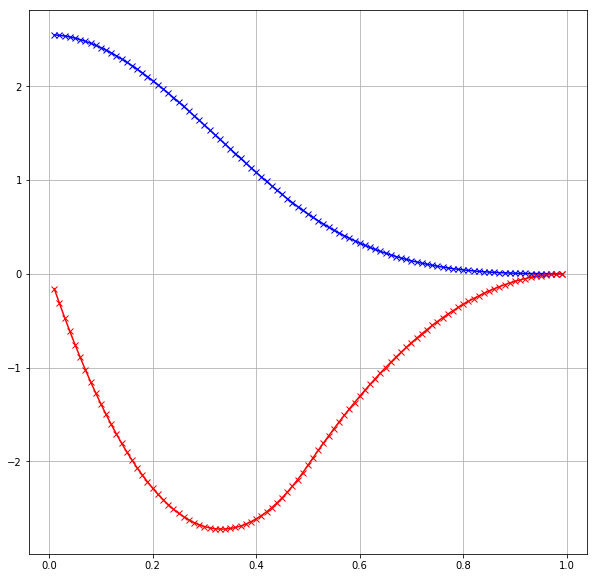

In [80]:
Wf = lambdify([r, h], W)
Wf_ = lambdify([r, h], W_)
plt.figure(figsize=(10,10))
rres = np.linalg.norm( wres[:,1:4], 2, axis=-1)
print(rres.shape)
plt.plot(rres, Wf(rres, wres[:,0]), "b")
plt.plot(rres, wres[:,2]*Wf_(rres, wres[:,0])/rres, "r")
plt.plot(rres, wres[:,4], "bx")
plt.plot(rres, wres[:,6], "rx")
plt.grid()

In [72]:
wres[0,:]

array([ 1.00000e+00,  2.67261e-03,  5.34522e-03,  8.01784e-03,
        4.94169e+00, -8.04440e-02, -1.60888e-01, -2.41332e-01])